## **Let's load and explore the data**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
df1 = pd.read_csv('areas.csv')
df2 = pd.read_csv('homeprices.csv')
df3 = pd.read_csv('homeprices-m.csv')

# Preview to confirm
print(df1.head())
print(df2.head())
print(df3.head())

   area
0  1000
1  1500
2  2300
3  3540
4  4120
   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000


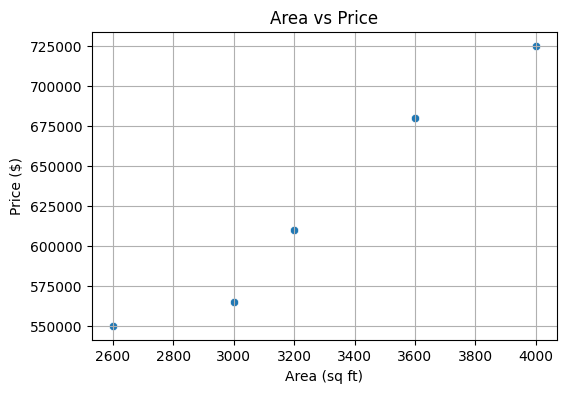

In [4]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='price', data=df2)
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

## **Now let's prepare the data**
We will also check for any null values



In [5]:
xvaluesdf = df2.drop('price',axis='columns')
print(xvaluesdf)

yvaluesdf = df2.price
print(yvaluesdf)

   area
0  2600
1  3000
2  3200
3  3600
4  4000
0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

# Check for missing values
print(df2.isnull().sum())

# Split into X and y
X = df2[['area']]  # features
y = df2['price']   # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


area     0
price    0
dtype: int64


## **We build the Model!**

In [12]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(xvaluesdf.values,yvaluesdf.values)

# Let's look at the m odel parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 180616.43835616432
Coefficient: 135.78767123287673


## **Now let's see how it performs**

In [13]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 12106.16
MSE: 264787600.86
RMSE: 16272.30
R² Score: 0.96


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## **Now, the Vizz!**

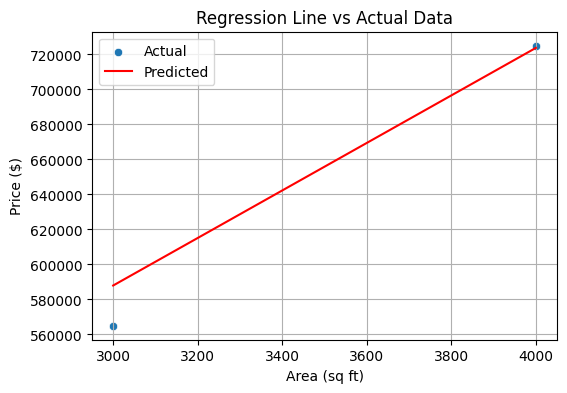

In [14]:
# Plotting the regression line with actual data
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test['area'], y=y_test, label='Actual')
sns.lineplot(x=X_test['area'], y=y_pred, color='red', label='Predicted')
plt.title('Regression Line vs Actual Data')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
print(X_test)
print(y_test)


   area
1  3000
4  4000
1    565000
4    725000
Name: price, dtype: int64
